# **Install libraries and Import Dataset**

In [ ]:
!pip install -q kaggle
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"ritikadwivedi","key":"52dedd01f183b11d1c831d50dd3c5615"}'}

In [ ]:
#create kaggle folder
! mkdir ~/.kaggle

In [ ]:
#copy the kaggle.json file to folder created
! cp kaggle.json ~/.kaggle/

In [ ]:
#permission for the json to act
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets list

ref                                                          title                                        size  lastUpdated          downloadCount  voteCount  usabilityRating  
-----------------------------------------------------------  ------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
hummaamqaasim/jobs-in-data                                   Jobs and Salaries in Data Science            76KB  2023-12-25 20:03:32           1543         30  1.0              
thedrcat/daigt-v2-train-dataset                              DAIGT V2 Train Dataset                       29MB  2023-11-16 01:38:36           3416        278  1.0              
willianoliveiragibin/road-accident-casualties                Road Accident Casualties                      7MB  2023-12-27 19:47:56            876         22  1.0              
marouandaghmoumi/dropout-and-success-student-data-analysis   Dropout and Success: Student Data Analysis   87KB  202

In [ ]:
!kaggle datasets download -d uciml/sms-spam-collection-dataset

  0% 0.00/211k [00:00<?, ?B/s]
100% 211k/211k [00:00<00:00, 79.9MB/s]


In [ ]:
!unzip sms-spam-collection-dataset.zip

Archive:  sms-spam-collection-dataset.zip
  inflating: spam.csv                


In [ ]:
df = pd.read_csv('spam.csv', encoding='latin1')

In [ ]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
4185,ham,"Hmm ok, i'll stay for like an hour cos my eye ...",NaN,NaN,NaN
3727,ham,The search 4 happiness is 1 of d main sources ...,NaN,NaN,NaN
2519,ham,Ok. I only ask abt e movie. U wan ktv oso?,NaN,NaN,NaN
3422,spam,Had your mobile 10 mths? Update to latest Oran...,NaN,NaN,NaN
226,spam,Will u meet ur dream partner soon? Is ur caree...,NaN,NaN,NaN


In [ ]:
df.shape

(5572, 5)

# **Data Cleaning**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


We need to drop last three columns as it consist of major null values

In [ ]:
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

Column names doesn't seems to tell any information about the feature, let us rename the columns

In [ ]:
df.rename(columns={'v1':'target','v2':'text'},inplace=True)

In [ ]:
df.head(3)

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...


In target column there is either ham or spam, let us encode these in numbers

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
encoder = LabelEncoder()

df['target'] = encoder.fit_transform(df['target'])

df.head(3)

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...


Let us check for any missing values

In [ ]:
df.isna().sum()

target    0
text      0
dtype: int64

Now, find out the duplicates and if any, remove it

In [ ]:
print(df.duplicated().sum())
df = df.drop_duplicates(keep='first')
print('-'*25)
print(df.duplicated().sum())

403
-------------------------
0


In [ ]:
df.shape

(5169, 2)

In [ ]:
df.head(3)

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...


Now, our data is clean!

# **Exploratory Data Analysis (EDA)**

First, we will check the percentage distribution of target.

In [ ]:
df['target'].value_counts()

0    4516
1     653
Name: target, dtype: int64

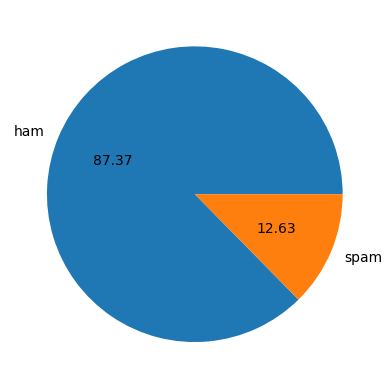

In [ ]:
plt.pie(df['target'].value_counts(), labels=['ham','spam'],autopct="%0.2f")
plt.show()

Data is imbalance!

To deep dive in data, let us count the number of characters,words, sentences in the text.

In [ ]:
!pip install nltk

In [ ]:
import nltk

In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
df['num_characters'] = df['text'].apply(len)

df.head(3)

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155


In [ ]:
df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

df.head(3)

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37


In [ ]:
df['num_sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

df.head(3)

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2


Let us check the mathematical description of these new features, with respect to the target feature.

In [ ]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [ ]:
# ham
df[df['target'] == 0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [ ]:
# spam
df[df['target'] == 1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


Looking at both the mean, we can say that the span are longer, in therms of characters, sentences and words.

Let us plot the same!

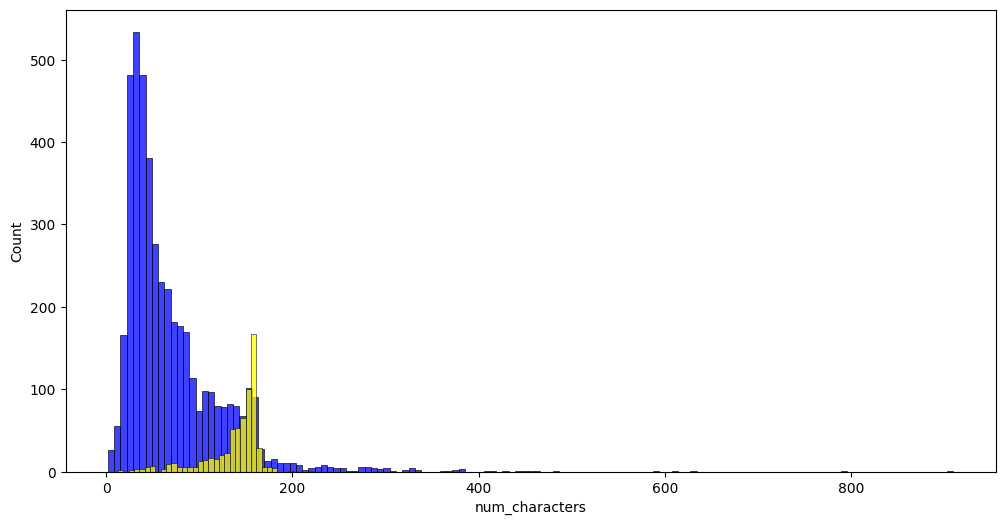

In [ ]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_characters'], color = 'blue')
sns.histplot(df[df['target'] == 1]['num_characters'],color='yellow')
plt.show()

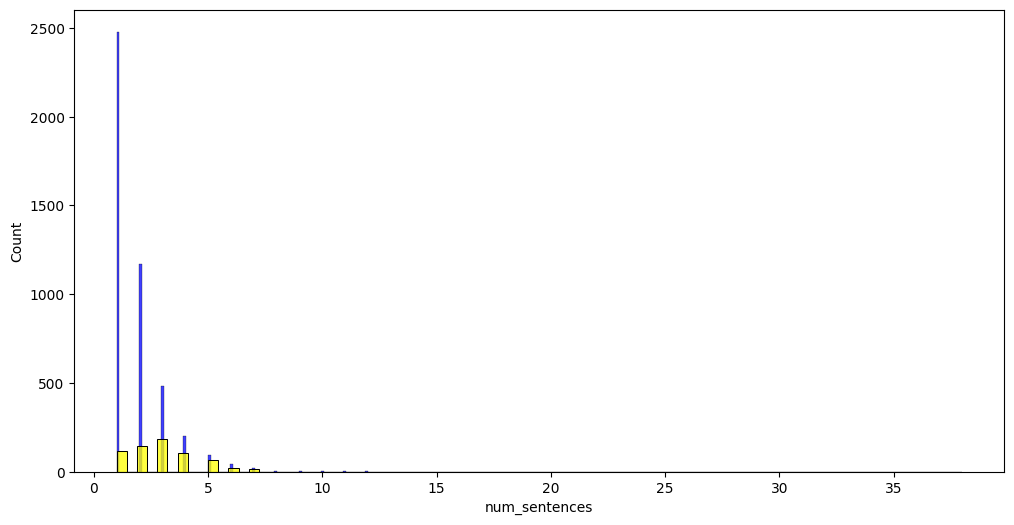

In [ ]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_sentences'], color = 'blue')
sns.histplot(df[df['target'] == 1]['num_sentences'],color='yellow')
plt.show()

Let us see the relation between these features.

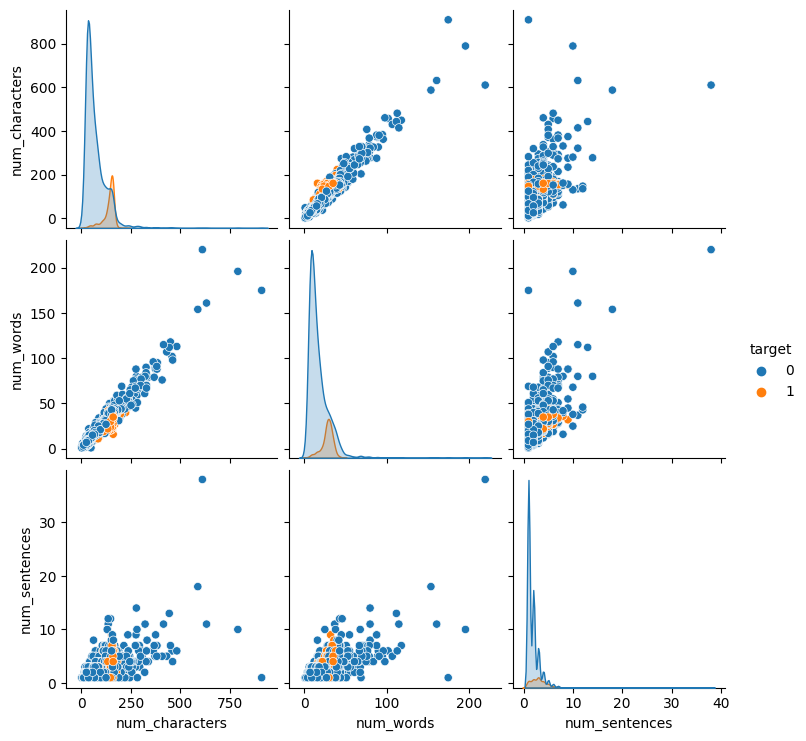

In [ ]:
sns.pairplot(df,hue='target')
plt.show()

**num_sentences** and **num_character** graph looks roughly linear **num_words** also shows similar graph with **num_sentences** and **num_character**.

Also, the data consist of Outlier.

Let us find the co relation.

<Axes: >

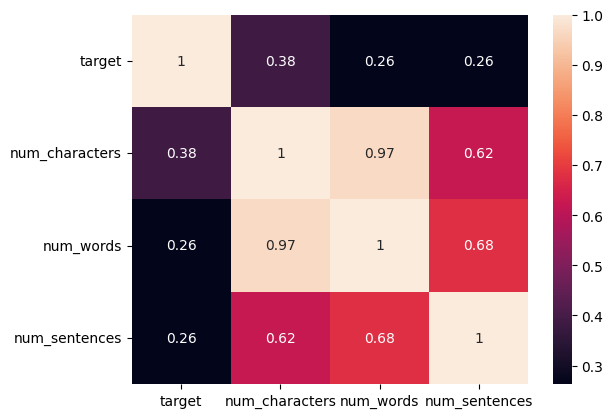

In [ ]:
sns.heatmap(df[['target', 'num_characters', 'num_words', 'num_sentences']].corr(),annot=True)

**num_words** and **num_character** are highly co related.

All three features have strong co relation with each other!

We will take one feature out of it, that will be num_characters because it has highest co relation with target among all (0.38).

# **Data Pre-processing**

In [ ]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
import string
from nltk.stem.porter import PorterStemmer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)

    y = []
    for i in text:
        if i.isalnum():
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        if i not in string.punctuation and i not in stopwords.words('english'):
            y.append(i)

    ps = PorterStemmer()
    text = y[:]
    y.clear()

    for i in text:
        y.append(ps.stem(i))

    return ' '.join(y)

In [ ]:
df['transformed_text'] = df['text'].apply(transform_text)

In [ ]:
df.head(3)

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...


Let us plot word cloud with respect to target variable.

In [ ]:
from wordcloud import WordCloud

In [ ]:
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='black')

Word Cloud for Spam SMS

In [ ]:
spam_wc = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep=" "))

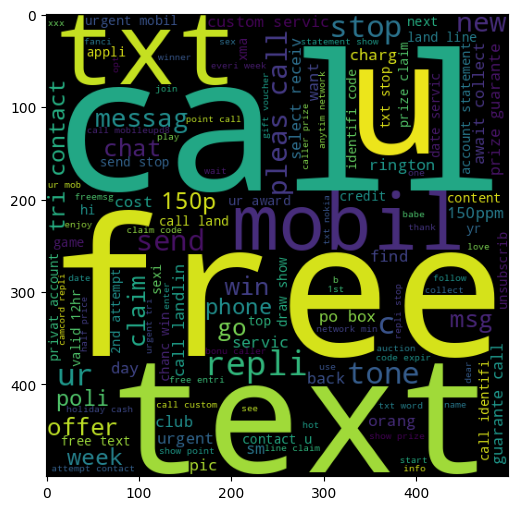

In [ ]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

Word Cloud for Ham SMS

In [ ]:
ham_wc = wc.generate(df[df['target'] == 0]['transformed_text'].str.cat(sep=" "))

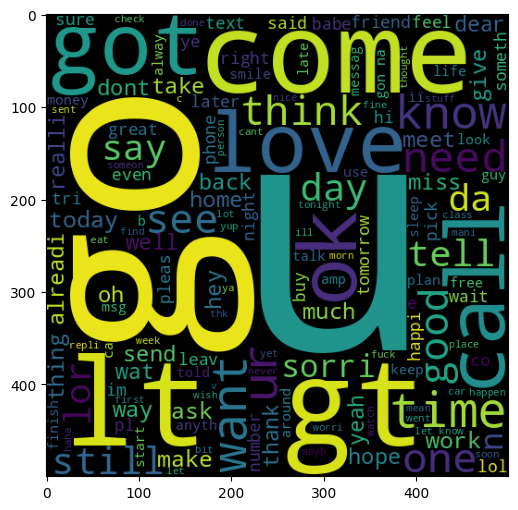

In [ ]:
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

Let us find top 50 words used in both ham and spam messages.

Top 50 words in Spam

In [ ]:
spam_corpus = []
for message in df[df['target'] == 1]['transformed_text'].to_list():
    for word in message.split():
        spam_corpus.append(word)

In [ ]:
from collections import Counter

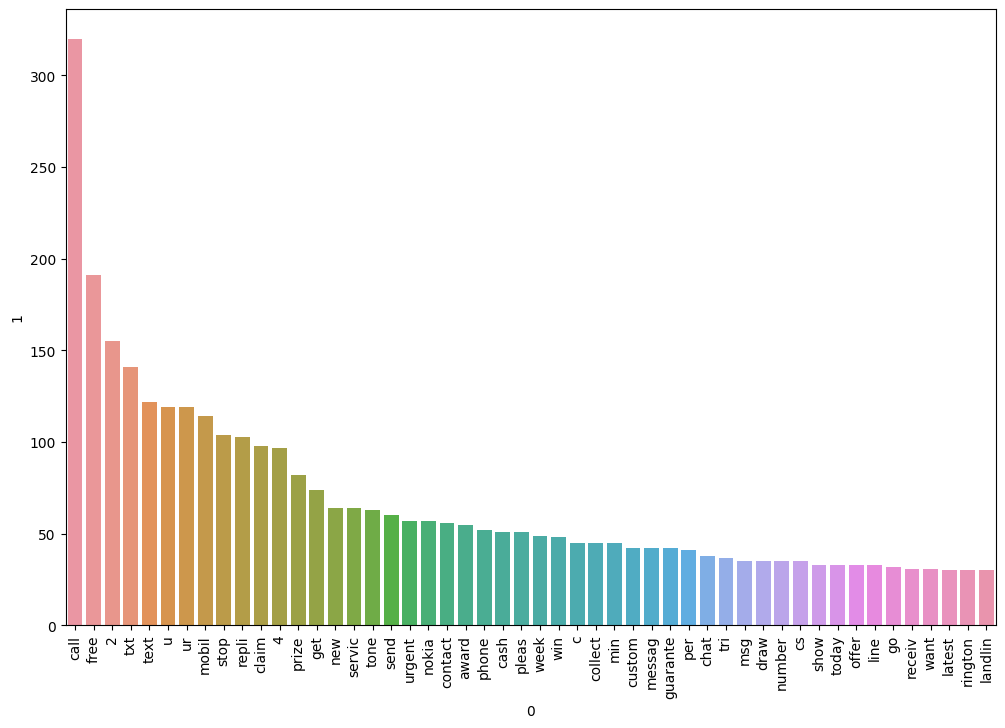

In [ ]:
spam_corpus_dataframe = pd.DataFrame(Counter(spam_corpus).most_common(50))

plt.figure(figsize = (12,8))
sns.barplot( x = spam_corpus_dataframe[0], y = spam_corpus_dataframe[1])
plt.xticks(rotation = 'vertical')
plt.show()

Top 50 words in Ham

In [ ]:
ham_corpus = []
for message in df[df['target'] == 0]['transformed_text'].to_list():
    for word in message.split():
        ham_corpus.append(word)

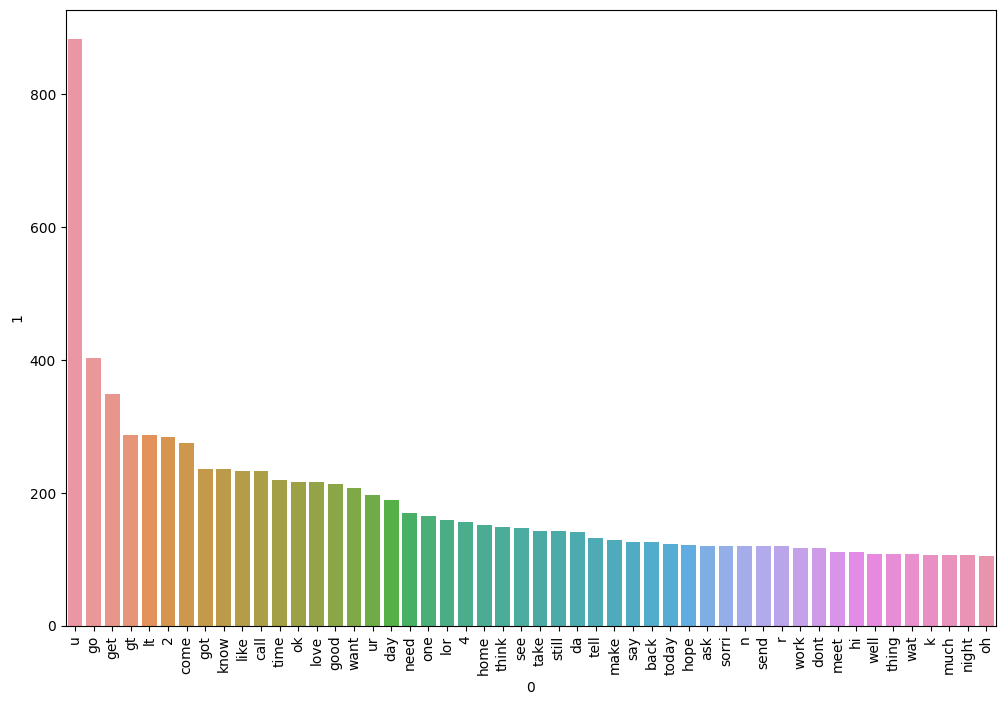

In [ ]:
ham_corpus_dataframe = pd.DataFrame(Counter(ham_corpus).most_common(50))

plt.figure(figsize = (12,8))
sns.barplot( x = ham_corpus_dataframe[0], y = ham_corpus_dataframe[1])
plt.xticks(rotation = 'vertical')
plt.show()

# **Model Building**

We need to convert text into vectors

By using Bag Of Words

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
cv = CountVectorizer()

In [ ]:
X = cv.fit_transform(df['transformed_text']).toarray()

In [ ]:
y = df['target'].values

In [ ]:
print(X.shape)
print(y.shape)

(5169, 6708)
(5169,)


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.25, random_state = 40)

In [ ]:
from sklearn.naive_bayes import GaussianNB , MultinomialNB, BernoulliNB

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

In [ ]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [ ]:
gnb.fit(X_train, y_train)
gnb_y_pred = gnb.predict(X_test)

print(accuracy_score(y_test,gnb_y_pred))
print('-'*20)
print(confusion_matrix(y_test,gnb_y_pred))
print('-'*20)
print(precision_score(y_test,gnb_y_pred))

0.8785769528228925
--------------------
[[1006  142]
 [  15  130]]
--------------------
0.47794117647058826


In [ ]:
mnb.fit(X_train, y_train)
mnb_y_pred = mnb.predict(X_test)

print(accuracay_score(y_test,mnb_y_pred))
print('-'*20)
print(confusion_matrix(y_test,mnb_y_pred))
print('-'*20)
print(precision_score(y_test,mnb_y_pred))

0.9791183294663574
--------------------
[[1129   19]
 [   8  137]]
--------------------
0.8782051282051282


In [ ]:
bnb.fit(X_train, y_train)
bnb_y_pred = bnb.predict(X_test)

print(accuracy_score(y_test,bnb_y_pred))
print('-'*20)
print(confusion_matrix(y_test,bnb_y_pred))
print('-'*20)
print(precision_score(y_test,bnb_y_pred))

0.9729311678267595
--------------------
[[1140    8]
 [  27  118]]
--------------------
0.9365079365079365


By using TFIDF

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
tfidf = TfidfVectorizer()

In [ ]:
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [ ]:
print(X.shape)
print(y.shape)

(5169, 6708)
(5169,)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.25, random_state = 40)

In [ ]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [ ]:
gnb.fit(X_train, y_train)
gnb_y_pred = gnb.predict(X_test)

print(accuracy_score(y_test,gnb_y_pred))
print('-'*20)
print(confusion_matrix(y_test,gnb_y_pred))
print('-'*20)
print(precision_score(y_test,gnb_y_pred))

0.8754833720030936
--------------------
[[1006  142]
 [  19  126]]
--------------------
0.4701492537313433


In [ ]:
mnb.fit(X_train, y_train)
mnb_y_pred = mnb.predict(X_test)

print(accuracy_score(y_test,mnb_y_pred))
print('-'*20)
print(confusion_matrix(y_test,mnb_y_pred))
print('-'*20)
print(precision_score(y_test,mnb_y_pred))

0.9667440061871616
--------------------
[[1148    0]
 [  43  102]]
--------------------
1.0


In [ ]:
bnb.fit(X_train, y_train)
bnb_y_pred = bnb.predict(X_test)

print(accuracy_score(y_test,bnb_y_pred))
print('-'*20)
print(confusion_matrix(y_test,bnb_y_pred))
print('-'*20)
print(precision_score(y_test,bnb_y_pred))

0.9729311678267595
--------------------
[[1140    8]
 [  27  118]]
--------------------
0.9365079365079365


**tfidf >> MNB**

**mnb >> bnb >> gnb**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [ ]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=40)
abc = AdaBoostClassifier(n_estimators=50, random_state=40)
bc = BaggingClassifier(n_estimators=50, random_state=40)
etc = ExtraTreesClassifier(n_estimators=50, random_state=40)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=40)
xgb = XGBClassifier(n_estimators=50,random_state=40)

In [ ]:
clfs = {
    'SVC' : svc,
    'KN' : knc,
    'NB': mnb,
    'DT': dtc,
    'LR': lrc,
    'RF': rfc,
    'AdaBoost': abc,
    'BgC': bc,
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [ ]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)

    return accuracy,precision

In [ ]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():

    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)

    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)

    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.9760247486465584
Precision -  0.9523809523809523
For  KN
Accuracy -  0.91415313225058
Precision -  1.0
For  NB
Accuracy -  0.9667440061871616
Precision -  1.0
For  DT
Accuracy -  0.9520494972931168
Precision -  0.8547008547008547
For  LR
Accuracy -  0.9559164733178654
Precision -  0.9230769230769231
For  RF
Accuracy -  0.9737045630317092
Precision -  0.9826086956521739
For  AdaBoost
Accuracy -  0.97138437741686
Precision -  0.9285714285714286
For  BgC
Accuracy -  0.97138437741686
Precision -  0.8857142857142857
For  ETC
Accuracy -  0.9752513534416086
Precision -  0.9829059829059829
For  GBDT
Accuracy -  0.9675174013921114
Precision -  0.9557522123893806
For  xgb
Accuracy -  0.9729311678267595
Precision -  0.9508196721311475


In [ ]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)
performance_df

,Algorithm,Accuracy,Precision
1,KN,0.914153,1.000000
2,NB,0.966744,1.000000
8,ETC,0.975251,0.982906
5,RF,0.973705,0.982609
9,GBDT,0.967517,0.955752
0,SVC,0.976025,0.952381
10,xgb,0.972931,0.950820
6,AdaBoost,0.971384,0.928571
4,LR,0.955916,0.923077
7,BgC,0.971384,0.885714


In [ ]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")

In [ ]:
performance_df1

,Algorithm,variable,value
0,KN,Accuracy,0.914153
1,NB,Accuracy,0.966744
2,ETC,Accuracy,0.975251
3,RF,Accuracy,0.973705
4,GBDT,Accuracy,0.967517
5,SVC,Accuracy,0.976025
6,xgb,Accuracy,0.972931
7,AdaBoost,Accuracy,0.971384
8,LR,Accuracy,0.955916
9,BgC,Accuracy,0.971384


<Figure size 1200x1200 with 0 Axes>

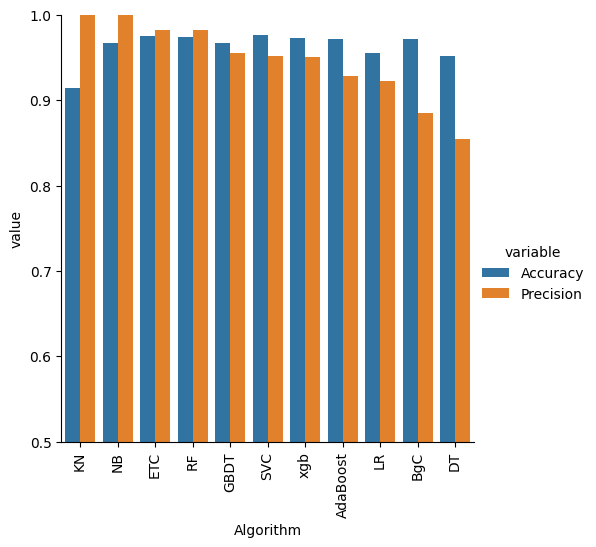

In [ ]:
plt.figure(figsize=(12,12))
sns.catplot(x = 'Algorithm', y='value',
               hue = 'variable',data=performance_df1, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

By using Tfidf max_features=3300

In [ ]:
tfidf = TfidfVectorizer(max_features=3300)

In [ ]:
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [ ]:
y = df['target'].values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.25, random_state = 40)

In [ ]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=40)
abc = AdaBoostClassifier(n_estimators=50, random_state=40)
bc = BaggingClassifier(n_estimators=50, random_state=40)
etc = ExtraTreesClassifier(n_estimators=50, random_state=40)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=40)
xgb = XGBClassifier(n_estimators=50,random_state=40)

In [ ]:
new_clfs = {
    'SVC' : svc,
    'KN' : knc,
    'NB': mnb,
    'DT': dtc,
    'LR': lrc,
    'RF': rfc,
    'AdaBoost': abc,
    'BgC': bc,
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [ ]:
def new_train_classifier(new_clf,X_train,y_train,X_test,y_test):
    new_clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)

    return accuracy,precision

In [ ]:
accuracy_scores = []
precision_scores = []

for name,new_clf in new_clfs.items():

    current_accuracy,current_precision = train_classifier(new_clf, X_train,y_train,X_test,y_test)

    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)

    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.9783449342614076
Precision -  0.9465648854961832
For  KN
Accuracy -  0.9187935034802784
Precision -  1.0
For  NB
Accuracy -  0.9775715390564579
Precision -  0.9915254237288136
For  DT
Accuracy -  0.9481825212683681
Precision -  0.8421052631578947
For  LR
Accuracy -  0.9559164733178654
Precision -  0.9150943396226415
For  RF
Accuracy -  0.9767981438515081
Precision -  0.9831932773109243
For  AdaBoost
Accuracy -  0.9706109822119103
Precision -  0.9212598425196851
For  BgC
Accuracy -  0.9690641918020109
Precision -  0.8776978417266187
For  ETC
Accuracy -  0.9814385150812065
Precision -  0.9689922480620154
For  GBDT
Accuracy -  0.9651972157772621
Precision -  0.9716981132075472
For  xgb
Accuracy -  0.9721577726218097
Precision -  0.936


In [ ]:
new_performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'New Accuracy':accuracy_scores,'New Precision':precision_scores}).sort_values('New Precision',ascending=False)
performance_df = pd.merge(performance_df, new_performance_df, on = 'Algorithm')
performance_df

,Algorithm,Accuracy,Precision,New Accuracy,New Precision
0,KN,0.914153,1.000000,0.918794,1.000000
1,NB,0.966744,1.000000,0.977572,0.991525
2,ETC,0.975251,0.982906,0.981439,0.968992
3,RF,0.973705,0.982609,0.976798,0.983193
4,GBDT,0.967517,0.955752,0.965197,0.971698
5,SVC,0.976025,0.952381,0.978345,0.946565
6,xgb,0.972931,0.950820,0.972158,0.936000
7,AdaBoost,0.971384,0.928571,0.970611,0.921260
8,LR,0.955916,0.923077,0.955916,0.915094
9,BgC,0.971384,0.885714,0.969064,0.877698


# **Prediction**

In [ ]:
def predict_spam_with_probability(input_text, model, vectorizer):
    # Preprocess the input text
    preprocessed_text = transform_text(input_text)

    # Vectorize the preprocessed text
    input_vectorized = vectorizer.transform([preprocessed_text]).toarray()

    # Make predictions using the trained model
    probabilities = model.predict_proba(input_vectorized)[0]

    # Get the predicted label and confidence score
    predicted_label = model.predict(input_vectorized)[0]
    confidence_score = probabilities[predicted_label]

    # Map the predicted label to original labels
    spam_label = encoder.inverse_transform([predicted_label])[0]

    return spam_label, confidence_score

# Example usage:
input_text_spam = "Congratulations! You've won a free iPhone. Click the link to claim your prize now!"
input_text_not_spam = "Hi, I hope you're doing well. Let's catch up soon."

predicted_label_spam, confidence_score_spam = predict_spam_with_probability(input_text_spam, mnb, tfidf)
predicted_label_not_spam, confidence_score_not_spam = predict_spam_with_probability(input_text_not_spam, mnb, tfidf)

print(f"Spam prediction- {predicted_label_spam} with confidence score: {confidence_score_spam:.2f}")
print(f"Not Spam prediction- {predicted_label_not_spam} with confidence score: {confidence_score_not_spam:.2f}")

Spam prediction- spam with confidence score: 0.94
Not Spam prediction- ham with confidence score: 0.99
